# Long Term Trends

Goals:
Analyze how variables (mood, metabolic markers) change over time

Visualize individual and group-level trends

Possibly model trajectories or seasonal patterns

### Import and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

hormonal_bc = pd.read_csv('../data/hormonal_bc_data.csv')
mood = pd.read_csv('../data/mood_tracking.csv')
metabolic = pd.read_csv('../data/metabolic_markers.csv')

# Parse dates for longitudinal data
mood['date'] = pd.to_datetime(mood['date'])
metabolic['date'] = pd.to_datetime(metabolic['date'])

### Plot average mood scores over time for hormonal BC users vs non-users

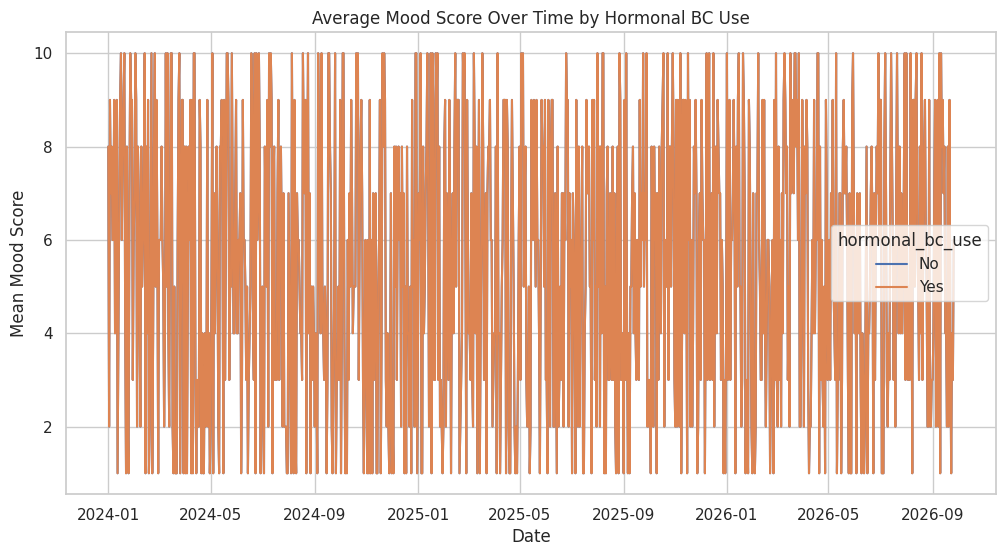

In [ ]:
# Merge mood with hormonal BC use info
mood_merged = mood.merge(hormonal_bc[['participant_id', 'hormonal_bc_use']], on='participant_id')

# Aggregate mean mood score per day per group
daily_mood = mood_merged.groupby(['date', 'hormonal_bc_use'])['mood_score'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_mood, x='date', y='mood_score', hue='hormonal_bc_use')
plt.title('Average Mood Score Over Time by Hormonal BC Use')
plt.xlabel('Date')
plt.ylabel('Mean Mood Score')
plt.show()

### Individual participant mood trajectories (random sample)

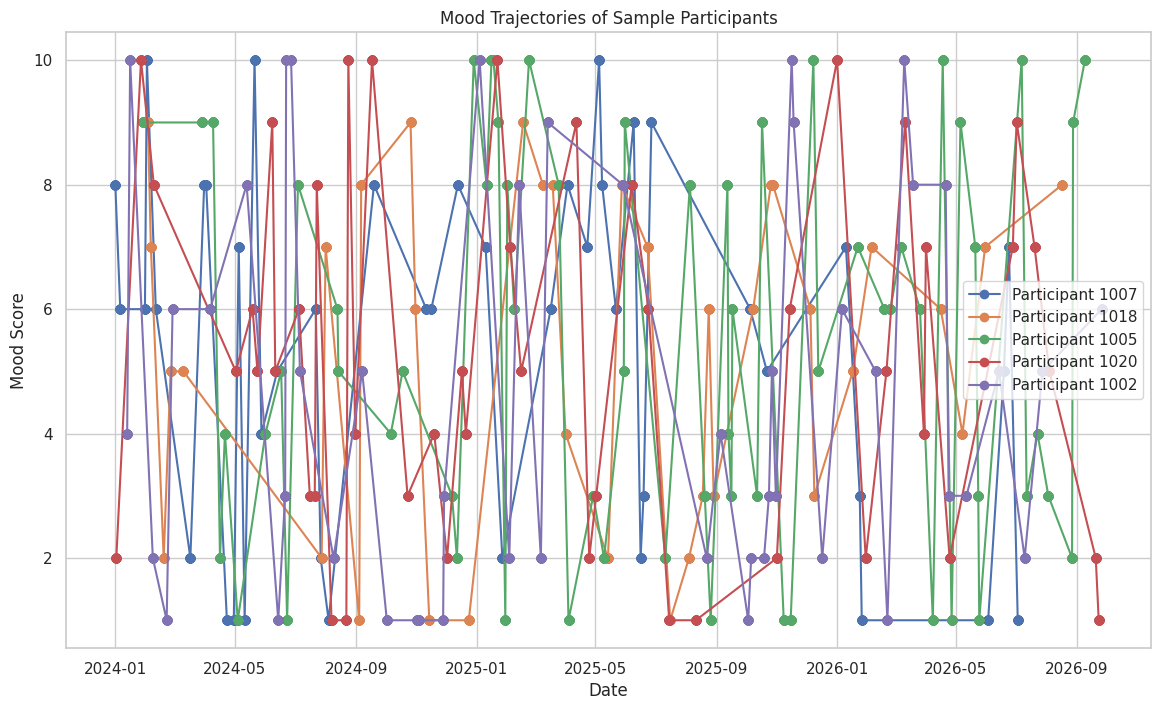

In [3]:
sample_ids = mood_merged['participant_id'].drop_duplicates().sample(5, random_state=42).values

plt.figure(figsize=(14,8))
for pid in sample_ids:
    df = mood_merged[mood_merged['participant_id'] == pid].sort_values('date')
    plt.plot(df['date'], df['mood_score'], marker='o', label=f'Participant {pid}')
plt.title('Mood Trajectories of Sample Participants')
plt.xlabel('Date')
plt.ylabel('Mood Score')
plt.legend()
plt.show()

### Longitudinal trends in metabolic markers for hormonal BC users vs non-users

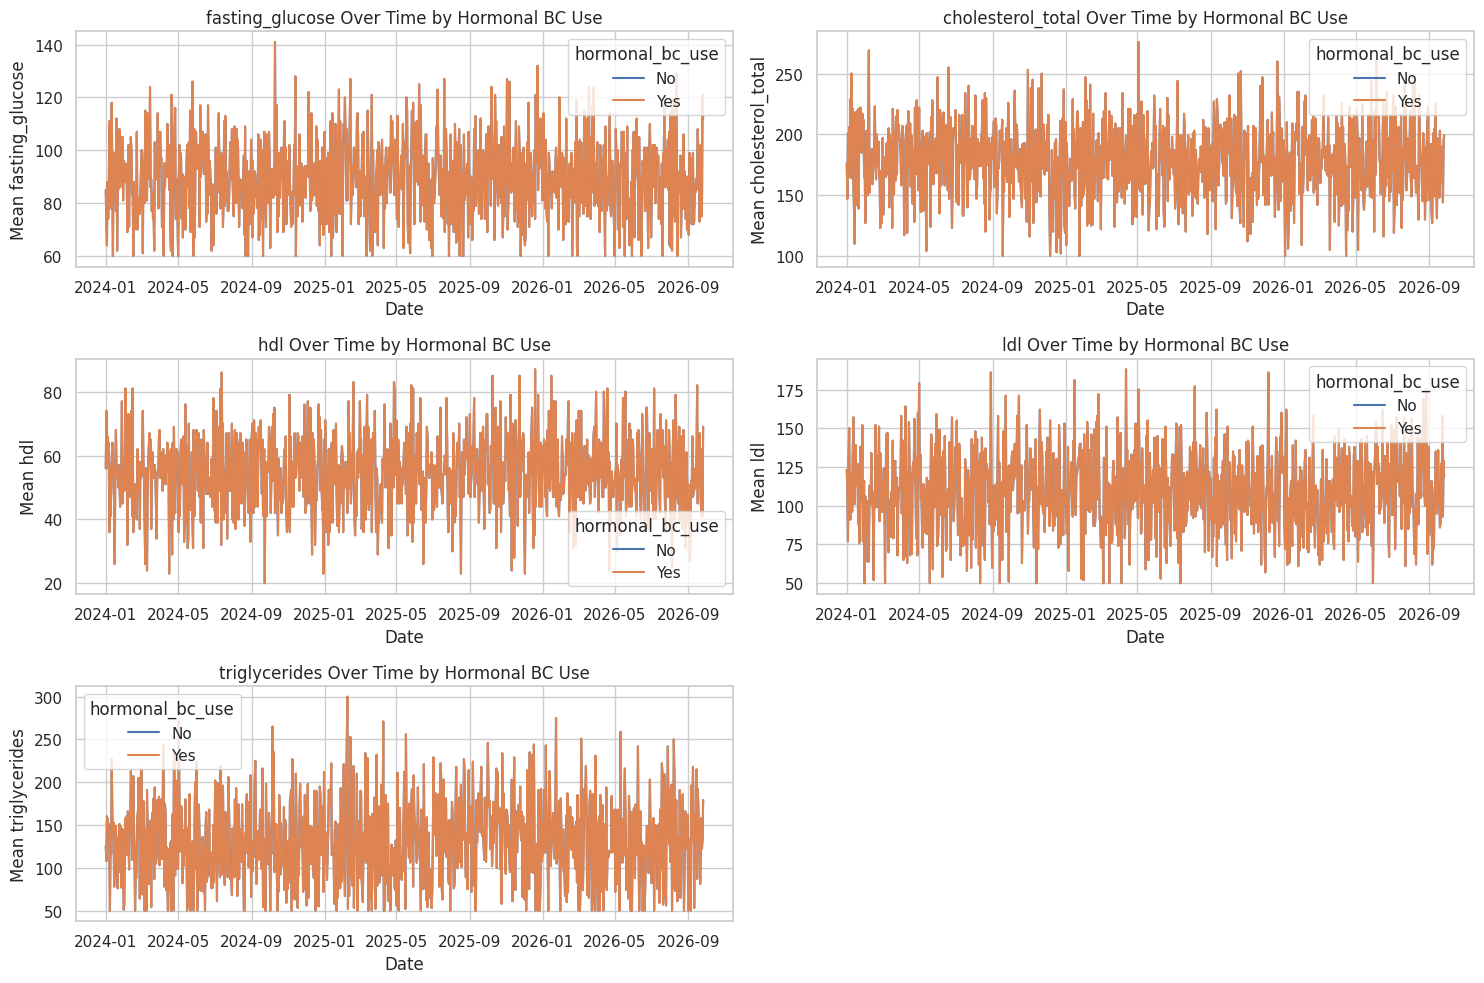

In [ ]:
metabolic_merged = metabolic.merge(hormonal_bc[['participant_id', 'hormonal_bc_use']], on='participant_id')

markers = ['fasting_glucose', 'cholesterol_total', 'hdl', 'ldl', 'triglycerides']

plt.figure(figsize=(15,10))
for i, marker in enumerate(markers, 1):
    plt.subplot(3, 2, i)
    daily_avg = metabolic_merged.groupby(['date', 'hormonal_bc_use'])[marker].mean().reset_index()
    sns.lineplot(data=daily_avg, x='date', y=marker, hue='hormonal_bc_use')
    plt.title(f'{marker} Over Time by Hormonal BC Use')
    plt.xlabel('Date')
    plt.ylabel(f'Mean {marker}')
plt.tight_layout()
plt.show()

### Latent States Over Time for Participant 1001

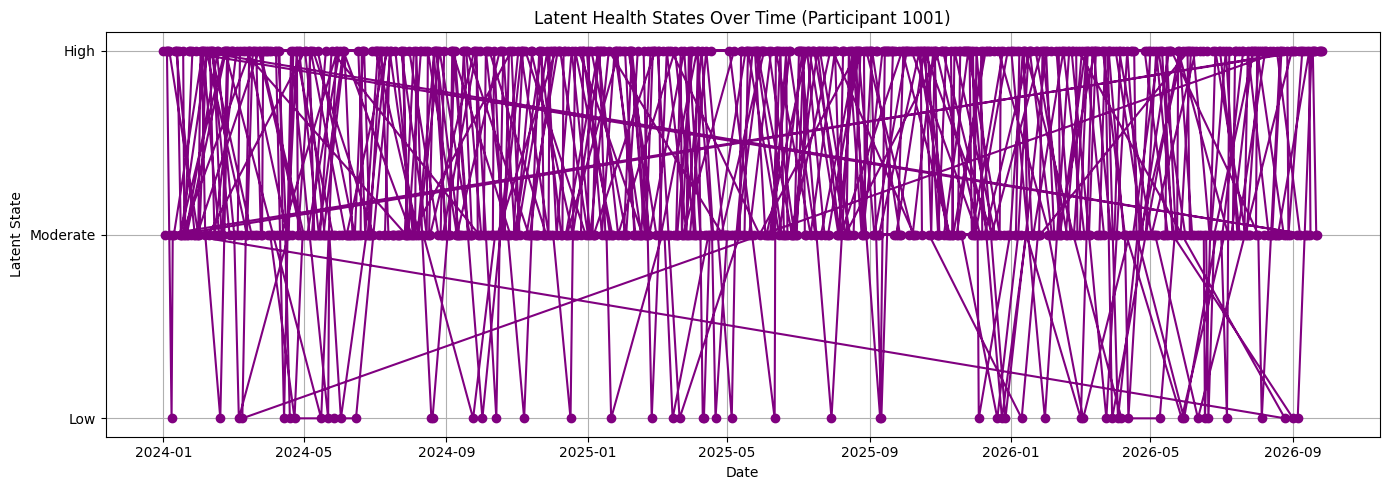

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("../results/metabolic_with_states.csv", parse_dates=['date'])

# Plot latent states
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['latent_state'], marker='o', linestyle='-', color='purple')
plt.title('Latent Health States Over Time (Participant 1001)')
plt.xlabel('Date')
plt.ylabel('Latent State')
plt.yticks([0, 1, 2], ['Low', 'Moderate', 'High'])
plt.grid(True)
plt.tight_layout()
plt.show()